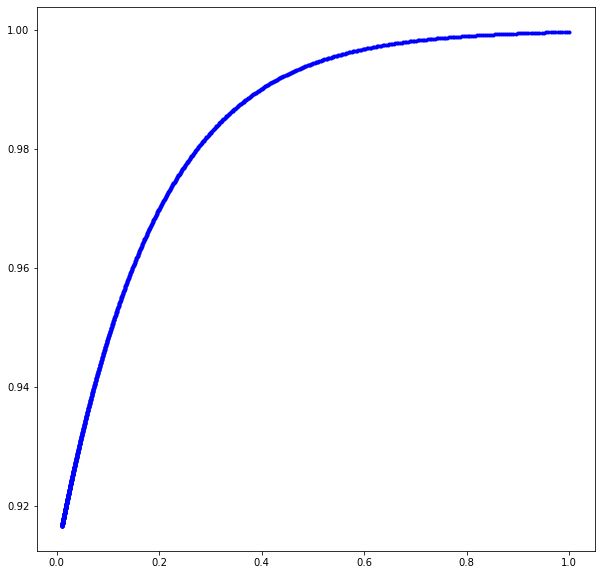

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

df = pd.read_csv('linearization.csv', header=None)
x1 = df[0].to_numpy()
y = df[1].to_numpy()
x1 = x1.reshape(len(x1),1)
y = y.reshape(len(x1),1)

fig = plt.figure(figsize=(10, 10))
plt.plot(x1, y, 'b.')

#linearizar a função
de acordo com a foto

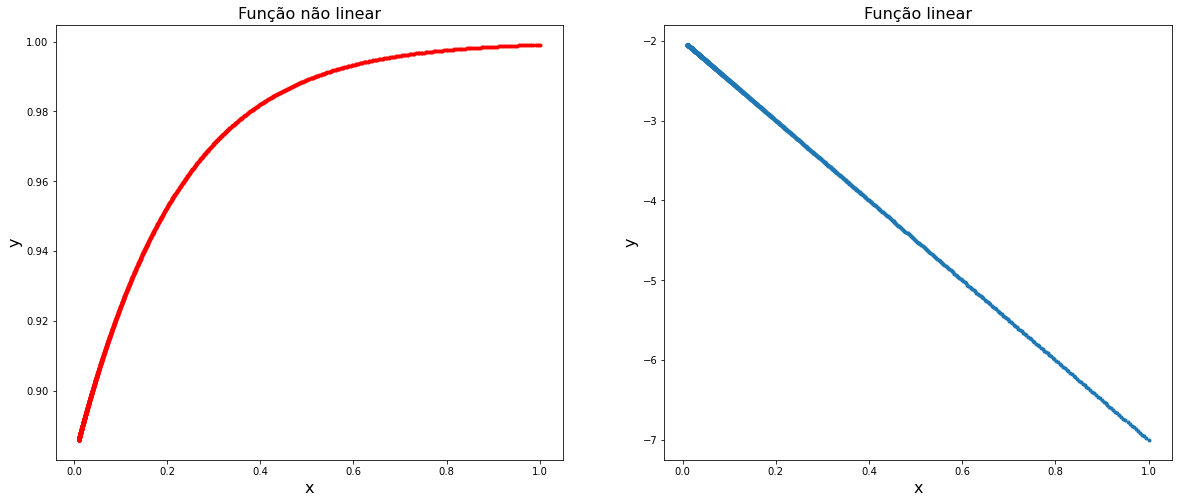

In [6]:
M =1000
X1 = np.random.uniform(0,2,(M,1))
a0 =2
a1 = 5
y = np.exp(a0+a1*x1)/(1+np.exp(a0+a1*x1))

x1_ = x1
y_ = np.log(1/y-1)


plt.figure(figsize=(20, 8))
ax = plt.subplot(1, 2, 1)
plt.plot(x1, y, 'r.')
plt.title('Função não linear', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

ax = plt.subplot(1, 2, 2)
plt.plot(x1_, y_, '.')
plt.title('Função linear', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

plt.show()


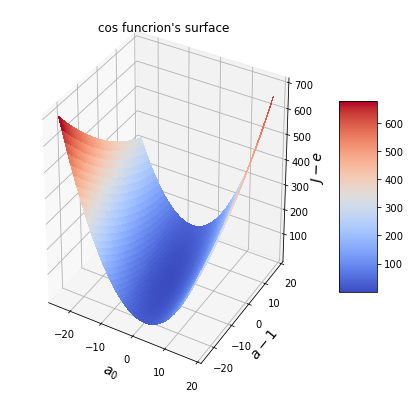

In [10]:
N = 200
a0 = np.linspace(-24.0, 18.0, N)
a1 = np.linspace(-24.0, 18.0, N)


A0, A1 = np.meshgrid(a0, a1)


J = np.zeros((N, N))

for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A0[iter1][iter2] + A1[iter1][iter2]*x1_
        J[iter1][iter2] = (1.0/M)*np.sum(np.square(y_ - yhat))
        
        
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A0, A1, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_0$', fontsize=14)
ax.set_ylabel('$a-1$', fontsize=14)
ax.set_zlabel('$J-e$', fontsize=14)
plt.title('cos funcrion\'s surface')
plt.show()


In [25]:
x1_ = np.c_[np.ones((M,1)), x1_]
a_opt = np.linalg.pinv(np.transpose(x1_).dot(x1_)).dot(np.transpose(x1_).dot(y_))
yhat = x1_.dot(a_opt)
joptimum = (1.0/M)*np.sum(np.power((y_ -yhat), 2))

In [42]:
def batchGradientDescent(x1_, y_, alpha = 0.5, n_iterations=M, a_init=np.array([-10.0, -10.0]).reshape(2, 1)):
    
    a = a_init
    
    a_hist = np.zeros((2, n_iterations+1))
    
    a_hist[:, 0] = a.reshape(2,)
    
    jgd = np.zeros(n_iterations+1)
    
    jgd[0] = (1.0/M)*sum(np.power(y_ -x1_.dot(a), 2))
    
    
    iteration = 0
    error = 1
    grad_hist = np.zeros((2, n_iterations))
    while iteration < n_iterations and error > 0.000001:
        gradients = -(2.0/M)*x1_.T.dot(y_ - x1_.dot(a))
        grad_hist[:, iteration] = gradients.reshape(2,)
        a = a - alpha*gradients
        a_hist[:, iteration+1] = a.reshape(2,)
        jgd[iteration+1] = (1.0/M)*sum(np.power((y_ -x1_.dot(a)), 2))
        error = np.abs(jgd[iteration+1] - jgd[iteration])
        iteration = iteration+1
    return a, jgd, a_hist, grad_hist, iteration

In [43]:
alpha = 0.5

a_init = np.array([-10, -10]).reshape(2,1)
n_iterations = M
a, jgd, a_hist, grad_hist, iteration =  batchGradientDescent(x1_, y_, alpha, n_iterations, a_init)


ValueError: Unrecognized character K in format string

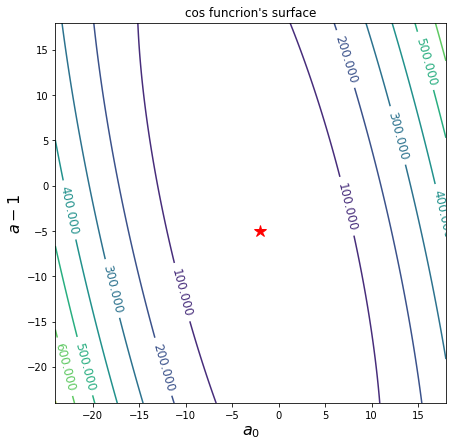

In [46]:
fig = plt.figure(figsize=(7,7))
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=12)
plt.xlabel('$a_0$', fontsize=16)
plt.ylabel('$a-1$', fontsize=16)
plt.title('cos funcrion\'s surface')

plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=12)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'Kx--')
plt.xticks(np.arange(-24, 18, step=4.0))
plt.yticks(np.arange(-24, 18, step=4.0))


plt.show()
